In [1]:
# Step 1: Importing Libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Step 2: Loading Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = malignant, 1 = benign

# Optional: Simulate priority (low = benign, high = malignant)
df['priority'] = df['target'].map({0: 'high', 1: 'low'})

# Step 3: Preparing Data
X = df.drop(['target', 'priority'], axis=1)
y = df['priority'].map({'high': 0, 'low': 1})  # Encode labels

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Training Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Making Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("✅ Accuracy:", round(accuracy, 4))
print("✅ F1 Score:", round(f1, 4))

✅ Accuracy: 0.9649
✅ F1 Score: 0.9722


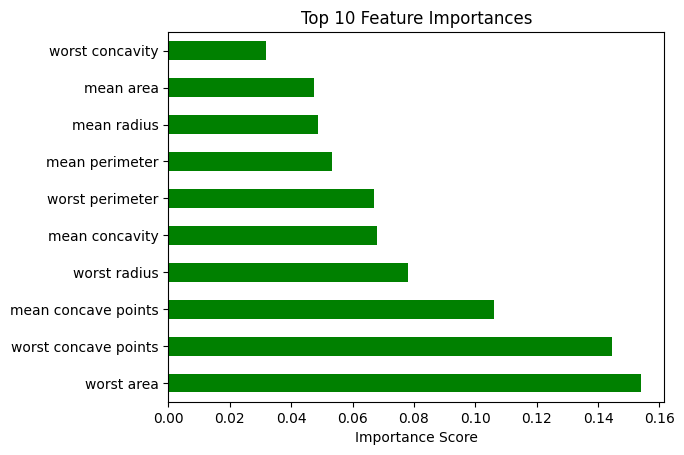

In [2]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh', color='green')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()

Ethical Reflection – Task 3:

The Breast Cancer dataset, while widely used and clean, may still carry hidden biases. For instance, the dataset primarily represents a single demographic or region, potentially underrepresenting minority groups. If this model were deployed in a healthcare software system, it might perform poorly on underrepresented patients — leading to unfair or incorrect prioritization of medical cases.

To address this, tools like IBM AI Fairness 360 can be integrated during the model training phase. These tools provide bias detection metrics and fairness-enhancing algorithms such as reweighting, disparate impact removal, and adversarial debiasing. By analyzing group-wise performance and taking corrective steps, developers can ensure that predictive models make decisions that are not just accurate but also fair across different populations.

It’s crucial to maintain transparency, audit trails, and involve domain experts during AI deployment in sensitive domains like healthcare or team management.

